# DSCI 552 Homework 7

Name: Ziyue Chen

Github Username: zic115

USC ID: 8823457220

In [1]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, hamming_loss, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from statistics import mean, stdev

# import warnings
# warnings.filterwarnings('ignore')

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

## 1. (a) Choose 70% of the data randomly as the training set

In [2]:
# Import data
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [3]:
# Split training and test sets
train, test = train_test_split(data, train_size = 0.7, random_state = 42)
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

## 1. (b) Solve a multi-class and multi-label problem by training a classifier for each label (binary relevance)

### 1. (b) ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers

In [4]:
# Generate X and y
X_train = train.iloc[:, :22]
y_train_fam = train['Family']
y_train_gen = train['Genus']
y_train_spe = train['Species']

X_test = test.iloc[:, :22]
y_test_fam = test['Family']
y_test_gen = test['Genus']
y_test_spe = test['Species']

In [5]:
# Find the parameter ranges - Family
value_try = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
value_range = []
for val in value_try:
    svm = SVC(C = val, kernel = 'rbf', gamma = val, decision_function_shape = 'ovr', random_state = 42)
    svm = svm.fit(X_train, y_train_fam)
    
    accuracy = svm.score(X_test, y_test_fam)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.1, 100]


In [6]:
# Cross-validation for best pair of C and gamma - Family
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
gammas = np.linspace(0.1, 100, 10)
param = {'C': Cs, 'gamma': gammas}
svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', random_state = 42)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train, y_train_fam)

In [7]:
# Choose the best pair - Family
print('C and gamma chosen by cross-validation:', clf.best_params_)

C and gamma chosen by cross-validation: {'C': 2.1544346900318834, 'gamma': 11.200000000000001}


In [8]:
# Use the best pair to refit the model - Family
svm = SVC(C = clf.best_params_['C'], kernel = 'rbf', gamma = clf.best_params_['gamma'], decision_function_shape = 'ovr', random_state = 42)
svm = svm.fit(X_train, y_train_fam)

In [9]:
# Test error - Family
test_error_fam = 1 - svm.score(X_test, y_test_fam)
print('test error for "Family" label:', test_error_fam)

test error for "Family" label: 0.012505789717461746


In [10]:
# Exact match and hamming score - Family
y_pred_fam = svm.predict(X_test)
exact_match_fam = accuracy_score(y_test_fam, y_pred_fam)
hamming_loss_fam = hamming_loss(y_test_fam, y_pred_fam)
print('exact match for "Family" label:', exact_match_fam)
print('hamming loss for "Family" label:', hamming_loss_fam)

exact match for "Family" label: 0.9874942102825383
hamming loss for "Family" label: 0.012505789717461788


In [11]:
# Find the parameter ranges - Genus
value_try = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
value_range = []
for val in value_try:
    svm = SVC(C = val, kernel = 'rbf', gamma = val, decision_function_shape = 'ovr', random_state = 42)
    svm = svm.fit(X_train, y_train_gen)
    
    accuracy = svm.score(X_test, y_test_gen)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.1, 100]


In [12]:
# Cross-validation for best pair of C and gamma - Genus
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
gammas = np.linspace(0.1, 100, 10)
param = {'C': Cs, 'gamma': gammas}
svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', random_state = 42)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train, y_train_gen)

In [13]:
# Choose the best pair - Genus
print('C and gamma chosen by cross-validation:', clf.best_params_)

C and gamma chosen by cross-validation: {'C': 100.0, 'gamma': 0.1}


In [14]:
# Use the best pair to refit the model - Genus
svm = SVC(C = clf.best_params_['C'], kernel = 'rbf', gamma = clf.best_params_['gamma'], decision_function_shape = 'ovr', random_state = 42)
svm = svm.fit(X_train, y_train_gen)

In [15]:
# Test error - Genus
test_error_gen = 1 - svm.score(X_test, y_test_gen)
print('test error for "Genus" label:', test_error_gen)

test error for "Genus" label: 0.014821676702176934


In [16]:
# Exact match and hamming score - Genus
y_pred_gen = svm.predict(X_test)
exact_match_gen = accuracy_score(y_test_gen, y_pred_gen)
hamming_loss_gen = hamming_loss(y_test_gen, y_pred_gen)
print('exact match for "Genus" label:', exact_match_gen)
print('hamming loss for "Genus" label:', hamming_loss_gen)

exact match for "Genus" label: 0.9851783232978231
hamming loss for "Genus" label: 0.014821676702176934


In [17]:
# Find the parameter ranges - Species
value_try = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
value_range = []
for val in value_try:
    svm = SVC(C = val, kernel = 'rbf', gamma = val, decision_function_shape = 'ovr', random_state = 42)
    svm = svm.fit(X_train, y_train_spe)
    
    accuracy = svm.score(X_test, y_test_spe)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.1, 100]


In [18]:
# Cross-validation for best pair of C and gamma - Species
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
gammas = np.linspace(0.1, 100, 10)
param = {'C': Cs, 'gamma': gammas}
svm = SVC(kernel = 'rbf', decision_function_shape = 'ovr', random_state = 42)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train, y_train_spe)

In [19]:
# Choose the best pair - Species
print('C and gamma chosen by cross-validation:', clf.best_params_)

C and gamma chosen by cross-validation: {'C': 100.0, 'gamma': 0.1}


In [20]:
# Use the best pair to refit the model - Species
svm = SVC(C = clf.best_params_['C'], kernel = 'rbf', gamma = clf.best_params_['gamma'], decision_function_shape = 'ovr', random_state = 42)
svm = svm.fit(X_train, y_train_spe)

In [21]:
# Test error - Species
test_error_spe = 1 - svm.score(X_test, y_test_spe)
print('test error for "Species" label:', test_error_spe)

test error for "Species" label: 0.013432144511347888


In [22]:
# Exact match and hamming score - Species
y_pred_spe = svm.predict(X_test)
exact_match_spe = accuracy_score(y_test_spe, y_pred_spe)
hamming_loss_spe = hamming_loss(y_test_spe, y_pred_spe)
print('exact match for "Species" label:', exact_match_spe)
print('hamming loss for "Species" label:', hamming_loss_spe)

exact match for "Species" label: 0.9865678554886521
hamming loss for "Species" label: 0.013432144511347846


### 1. (b) iii. Repeat 1.(b) ii. with L1-penalized SVMs

In [23]:
# Standardize the attributes
X_train_s = train.iloc[:, :22]
X_test_s = test.iloc[:, :22]

scaler = StandardScaler()
X_train_s[:] = scaler.fit_transform(X_train_s[:])
X_test_s[:] = scaler.transform(X_test_s[:])

In [24]:
# Find the parameter ranges - Family
value_try = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
value_range = []
for val in value_try:
    svm = LinearSVC(penalty = 'l1', dual = False, C = val, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
    svm = svm.fit(X_train_s, y_train_fam)
    
    accuracy = svm.score(X_test_s, y_test_fam)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.001, 100000]


In [25]:
# Cross-validation for best C - Family
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
param = {'C': Cs}
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_fam)

In [26]:
# Choose the best C - Family
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'C': 0.46415888336127775}


In [27]:
# Use the best C to refit the model - Family
svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_s, y_train_fam)

In [28]:
# Test error - Family
test_error_fam = 1 - svm.score(X_test_s, y_test_fam)
print('test error for "Family" label:', test_error_fam)

test error for "Family" label: 0.0722556739231126


In [29]:
# Exact match and hamming score - Family
y_pred_fam = svm.predict(X_test_s)
exact_match_fam = accuracy_score(y_test_fam, y_pred_fam)
hamming_loss_fam = hamming_loss(y_test_fam, y_pred_fam)
print('exact match for "Family" label:', exact_match_fam)
print('hamming loss for "Family" label:', hamming_loss_fam)

exact match for "Family" label: 0.9277443260768874
hamming loss for "Family" label: 0.07225567392311255


In [30]:
# Find the parameter ranges - Genus
value_try = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
value_range = []
for val in value_try:
    svm = LinearSVC(penalty = 'l1', dual = False, C = val, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
    svm = svm.fit(X_train_s, y_train_gen)
    
    accuracy = svm.score(X_test_s, y_test_gen)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.001, 100000]


In [31]:
# Cross-validation for best C - Genus
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
param = {'C': Cs}
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_gen)

In [32]:
# Choose the best C - Genus
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'C': 3.593813663804626}


In [33]:
# Use the best C to refit the model - Genus
svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_s, y_train_gen)

In [34]:
# Test error - Genus
test_error_gen = 1 - svm.score(X_test_s, y_test_gen)
print('test error for "Genus" label:', test_error_gen)

test error for "Genus" label: 0.05882352941176472


In [35]:
# Exact match and hamming score - Genus
y_pred_gen = svm.predict(X_test_s)
exact_match_gen = accuracy_score(y_test_gen, y_pred_gen)
hamming_loss_gen = hamming_loss(y_test_gen, y_pred_gen)
print('exact match for "Genus" label:', exact_match_gen)
print('hamming loss for "Genus" label:', hamming_loss_gen)

exact match for "Genus" label: 0.9411764705882353
hamming loss for "Genus" label: 0.058823529411764705


In [36]:
# Find the parameter ranges - Species
value_try = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
value_range = []
for val in value_try:
    svm = LinearSVC(penalty = 'l1', dual = False, C = val, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
    svm = svm.fit(X_train_s, y_train_spe)
    
    accuracy = svm.score(X_test_s, y_test_spe)    
    if accuracy > 0.7:
        value_range.append(val)

print('parameter range:', [value_range[0], value_range[-1]])

parameter range: [0.001, 100000]


In [37]:
# Cross-validation for best C - Species
logCs = np.linspace(np.log10(value_range[0]), np.log10(value_range[-1]), 10)
Cs = [10**power for power in logCs]
param = {'C': Cs}
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)

clf = GridSearchCV(estimator = svm, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_spe)

In [38]:
# Choose the best C - Species
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'C': 3.593813663804626}


In [39]:
# Use the best C to refit the model - Species
svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_s, y_train_spe)

In [40]:
# Test error - Species
test_error_spe = 1 - svm.score(X_test_s, y_test_spe)
print('test error for "Species" label:', test_error_spe)

test error for "Species" label: 0.04075961093098657


In [41]:
# Exact match and hamming score - Species
y_pred_spe = svm.predict(X_test_s)
exact_match_spe = accuracy_score(y_test_spe, y_pred_spe)
hamming_loss_spe = hamming_loss(y_test_spe, y_pred_spe)
print('exact match for "Species" label:', exact_match_spe)
print('hamming loss for "Species" label:', hamming_loss_spe)

exact match for "Species" label: 0.9592403890690134
hamming loss for "Species" label: 0.04075961093098657


### 1. (b) iv. Repeat 1. (b) iii. by using SMOTE to remedy class imbalance

In [42]:
# Cross-validation for best C - Family
X_train_s = train.iloc[:, :22]

smote = SMOTE(random_state = 42)
scaler = StandardScaler()
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
param = {'classifier__C': Cs}

pipeline = Pipeline(steps = [['smote', smote], ['scale', scaler], ['classifier', svm]])

clf = GridSearchCV(estimator = pipeline, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_fam)

In [43]:
# Choose the best C - Family
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'classifier__C': 3.593813663804626}


In [44]:
# Use the best C to refit the model - Family
X_train_smote, y_train_fam = smote.fit_resample(X_train_s, y_train_fam)
X_train_smote[:] = scaler.fit_transform(X_train_smote[:])

svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['classifier__C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_smote, y_train_fam)

In [45]:
# Test error - Family
X_test_s = test.iloc[:, :22]
X_test_s[:] = scaler.transform(X_test_s[:])
test_error_fam = 1 - svm.score(X_test_s, y_test_fam)
print('test error for "Family" label:', test_error_fam)

test error for "Family" label: 0.09031959240389065


In [46]:
# Exact match and hamming score - Family
y_pred_fam = svm.predict(X_test_s)
exact_match_fam = accuracy_score(y_test_fam, y_pred_fam)
hamming_loss_fam = hamming_loss(y_test_fam, y_pred_fam)
print('exact match for "Family" label:', exact_match_fam)
print('hamming loss for "Family" label:', hamming_loss_fam)

exact match for "Family" label: 0.9096804075961094
hamming loss for "Family" label: 0.09031959240389069


In [47]:
# Cross-validation for best C - Genus
X_train_s = train.iloc[:, :22]

smote = SMOTE(random_state = 42)
scaler = StandardScaler()
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
param = {'classifier__C': Cs}

pipeline = Pipeline(steps = [['smote', smote], ['scale', scaler], ['classifier', svm]])

clf = GridSearchCV(estimator = pipeline, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_gen)

In [48]:
# Choose the best C - Genus
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'classifier__C': 3.593813663804626}


In [49]:
# Use the best C to refit the model - Genus
X_train_smote, y_train_gen = smote.fit_resample(X_train_s, y_train_gen)
X_train_smote[:] = scaler.fit_transform(X_train_smote[:])

svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['classifier__C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_smote, y_train_gen)

In [50]:
# Test error - Genus
X_test_s = test.iloc[:, :22]
X_test_s[:] = scaler.transform(X_test_s[:])
test_error_gen = 1 - svm.score(X_test_s, y_test_gen)
print('test error for "Genus" label:', test_error_gen)

test error for "Genus" label: 0.09819360815192224


In [51]:
# Exact match and hamming score - Genus
y_pred_gen = svm.predict(X_test_s)
exact_match_gen = accuracy_score(y_test_gen, y_pred_gen)
hamming_loss_gen = hamming_loss(y_test_gen, y_pred_gen)
print('exact match for "Genus" label:', exact_match_gen)
print('hamming loss for "Genus" label:', hamming_loss_gen)

exact match for "Genus" label: 0.9018063918480778
hamming loss for "Genus" label: 0.09819360815192218


In [52]:
# Cross-validation for best C - Species
X_train_s = train.iloc[:, :22]

smote = SMOTE(random_state = 42)
scaler = StandardScaler()
svm = LinearSVC(penalty = 'l1', dual = False, multi_class = 'ovr', random_state = 42, max_iter = 1000000)
param = {'classifier__C': Cs}

pipeline = Pipeline(steps = [['smote', smote], ['scale', scaler], ['classifier', svm]])

clf = GridSearchCV(estimator = pipeline, param_grid = param, cv = 10)
clf = clf.fit(X_train_s, y_train_spe)

In [53]:
# Choose the best C - Species
print('C chosen by cross-validation:', clf.best_params_)

C chosen by cross-validation: {'classifier__C': 0.46415888336127775}


In [54]:
# Use the best C to refit the model - Species
X_train_smote, y_train_spe = smote.fit_resample(X_train_s, y_train_spe)
X_train_smote[:] = scaler.fit_transform(X_train_smote[:])

svm = LinearSVC(penalty = 'l1', dual = False, C = clf.best_params_['classifier__C'], multi_class = 'ovr', random_state = 42, max_iter = 1000000)
svm = svm.fit(X_train_smote, y_train_spe)

In [55]:
# Test error - Species
X_test_s = test.iloc[:, :22]
X_test_s[:] = scaler.transform(X_test_s[:])
test_error_spe = 1 - svm.score(X_test_s, y_test_spe)
print('test error for "Species" label:', test_error_spe)

test error for "Species" label: 0.03983325613710054


In [56]:
# Exact match and hamming score - Species
y_pred_spe = svm.predict(X_test_s)
exact_match_spe = accuracy_score(y_test_spe, y_pred_spe)
hamming_loss_spe = hamming_loss(y_test_spe, y_pred_spe)
print('exact match for "Species" label:', exact_match_spe)
print('hamming loss for "Species" label:', hamming_loss_spe)

exact match for "Species" label: 0.9601667438628995
hamming loss for "Species" label: 0.03983325613710051


Compare the results:

SVM
- Family: exact match = 0.9874942102825383, hamming loss = 0.012505789717461788
- Genus: exact match = 0.9851783232978231, hamming loss = 0.014821676702176934
- Species: exact match = 0.9865678554886521, hamming loss = 0.013432144511347846

L1-penalized SVM
- Family: exact match = 0.9277443260768874, hamming loss = 0.07225567392311255
- Genus: exact match = 0.9411764705882353, hamming loss = 0.058823529411764705
- Species: exact match = 0.9592403890690134, hamming loss = 0.04075961093098657

L1-penalized SVM with SMOTE
- Family: exact match = 0.9096804075961094, hamming loss = 0.09031959240389069
- Genus: exact match = 0.9018063918480778, hamming loss = 0.09819360815192218
- Species: exact match = 0.9601667438628995, hamming loss = 0.03983325613710051

Among the three types of classifiers, the SVM classifier resulted in the highest exact match and lowest hamming loss for the three labels, and the L1-penalized SVM with SMOTE classifier resulted in the lowest exact match and highest hamming loss.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

In [57]:
# Monte-Carlo Simulation
X = data.iloc[:, :22]

opt_ks = []
all_triplets = []
avg_hamming_losses = []
avg_hamming_scores = []
avg_hamming_distances = []

# Perform 50 times
for _ in range(50):
    # 2. (a) Use k-means clustering on the whole Anuran Calls (MFCCs) data set
    # Choose the best k using Silhouette scores
    record = {}
    for k in range(2, 51):
        kmeans = KMeans(n_clusters = k)
        kmeans = kmeans.fit(X)
        cluster_labels = kmeans.labels_
    
        score = silhouette_score(X, cluster_labels)
        record[k] = score
    
    # Find the best k
    opt_k = max(record, key = record.get)
    opt_ks.append(opt_k)
    
    # 2. (b) In each cluster, determine which family/genus/species is the majority
    # Use the best k to refit the model
    kmeans = KMeans(n_clusters = opt_k)
    y_pred = kmeans.fit_predict(X)
    cluster_labels = kmeans.labels_
    
    # Add a "Cluster" column
    clusters = pd.DataFrame({'Cluster':cluster_labels.tolist()})
    data_clusters = pd.concat([data, clusters], axis = 1)
    
    # Determine the majority label triplets
    triplets = {}
    for i in range(opt_k):
        cluster_i_data = data_clusters[data_clusters['Cluster'] == i]
        maj_fam = cluster_i_data['Family'].value_counts().index[0]
        maj_gen = cluster_i_data['Genus'].value_counts().index[0]
        maj_spe = cluster_i_data['Species'].value_counts().index[0]
        triplets[i] = (maj_fam, maj_gen, maj_spe)
    all_triplets.append(triplets)
    
    # Add prediction columns based on majority votes
    data_clusters['Family_pred'] = ''
    data_clusters['Genus_pred'] = ''
    data_clusters['Species_pred'] = ''

    for i in range(opt_k):
        data_clusters['Family_pred'] = np.where(data_clusters['Cluster'] == i, triplets[i][0], data_clusters['Family_pred'])
        data_clusters['Genus_pred'] = np.where(data_clusters['Cluster'] == i, triplets[i][1], data_clusters['Genus_pred'])
        data_clusters['Species_pred'] = np.where(data_clusters['Cluster'] == i, triplets[i][2], data_clusters['Species_pred'])
    
    # 2. (c) Calculate the average Hamming distance, Hamming score, and Hamming loss
    # Hamming loss, Hamming score, and Hamming distance for each label
    hamming_loss_fam = hamming_loss(data_clusters['Family'], data_clusters['Family_pred'])
    hamming_score_fam = 1 - hamming_loss_fam
    hamming_distance_fam = int(hamming_loss_fam * len(data_clusters))

    hamming_loss_gen = hamming_loss(data_clusters['Genus'], data_clusters['Genus_pred'])
    hamming_score_gen = 1 - hamming_loss_gen
    hamming_distance_gen = int(hamming_loss_gen * len(data_clusters))

    hamming_loss_spe = hamming_loss(data_clusters['Species'], data_clusters['Species_pred'])
    hamming_score_spe = 1 - hamming_loss_spe
    hamming_distance_spe = int(hamming_loss_spe * len(data_clusters))
    
    # Average Hamming loss, Hamming score, and Hamming distance
    avg_hamming_loss = (hamming_loss_fam + hamming_loss_gen + hamming_loss_spe) / 3
    avg_hamming_score = (hamming_score_fam + hamming_score_gen + hamming_score_spe) / 3
    avg_hamming_distance = int((hamming_distance_fam + hamming_distance_gen + hamming_distance_spe) / 3)
    avg_hamming_losses.append(avg_hamming_loss)
    avg_hamming_scores.append(avg_hamming_score)
    avg_hamming_distances.append(avg_hamming_distance)

In [58]:
# Organize and the results
data = {'opt_k': opt_ks, 'triplets': all_triplets, 'Hamming loss': avg_hamming_losses,
        'Hamming score': avg_hamming_scores, 'Hamming distance': avg_hamming_distances}
results = pd.DataFrame(data)
results

,opt_k,triplets,Hamming loss,Hamming score,Hamming distance
0,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.222423,0.777577,1600
1,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.222423,0.777577,1600
2,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.222423,0.777577,1600
3,4,"{0: ('Hylidae', 'Hypsiboas', 'HypsiboasCordoba...",0.222423,0.777577,1600
4,4,"{0: ('Hylidae', 'Hypsiboas', 'HypsiboasCordoba...",0.221774,0.778226,1595
5,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.222423,0.777577,1600
6,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.245263,0.754737,1764
7,4,"{0: ('Hylidae', 'Hypsiboas', 'HypsiboasCordoba...",0.222423,0.777577,1600
8,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.222423,0.777577,1600
9,4,"{0: ('Leptodactylidae', 'Adenomera', 'Adenomer...",0.245124,0.754876,1763


In [59]:
# Calculate the average and standard deviation of the 50 Hamming Distances
avg = mean(avg_hamming_distances)
std = stdev(avg_hamming_distances)
print('average of the 50 Hamming distances:', avg)
print('standard deviation of the 50 Hamming distances:', std)

average of the 50 Hamming distances: 1620.9
standard deviation of the 50 Hamming distances: 72.31514082014039


# 3. ISLR 12.6.2

## 3. (a) Sketch the dendrogram using complete linkage clustering
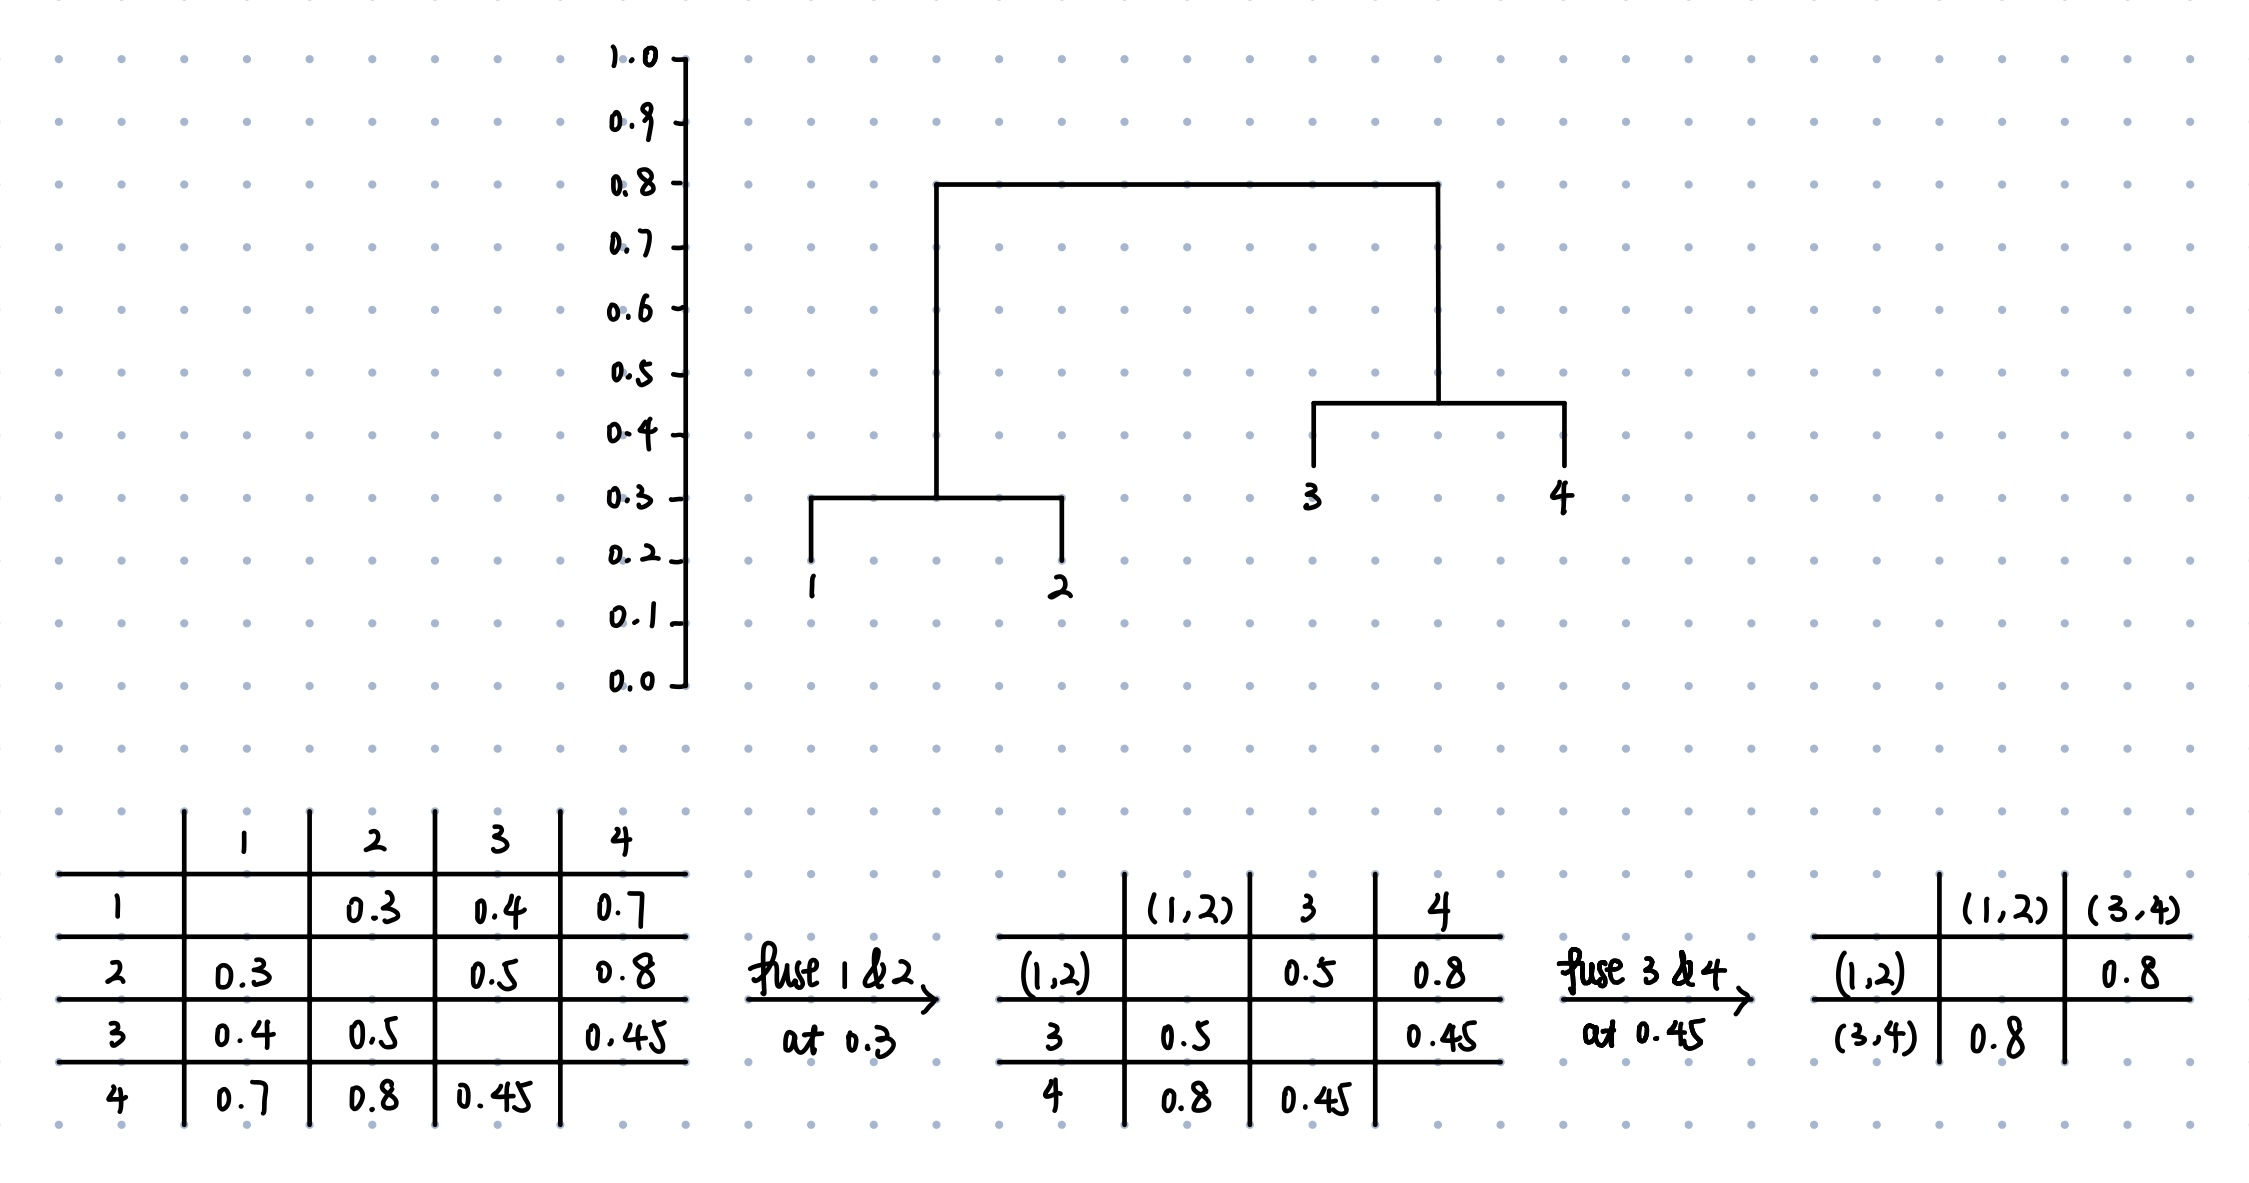

## 3. (b) Sketch the dendrogram using single linkage clustering
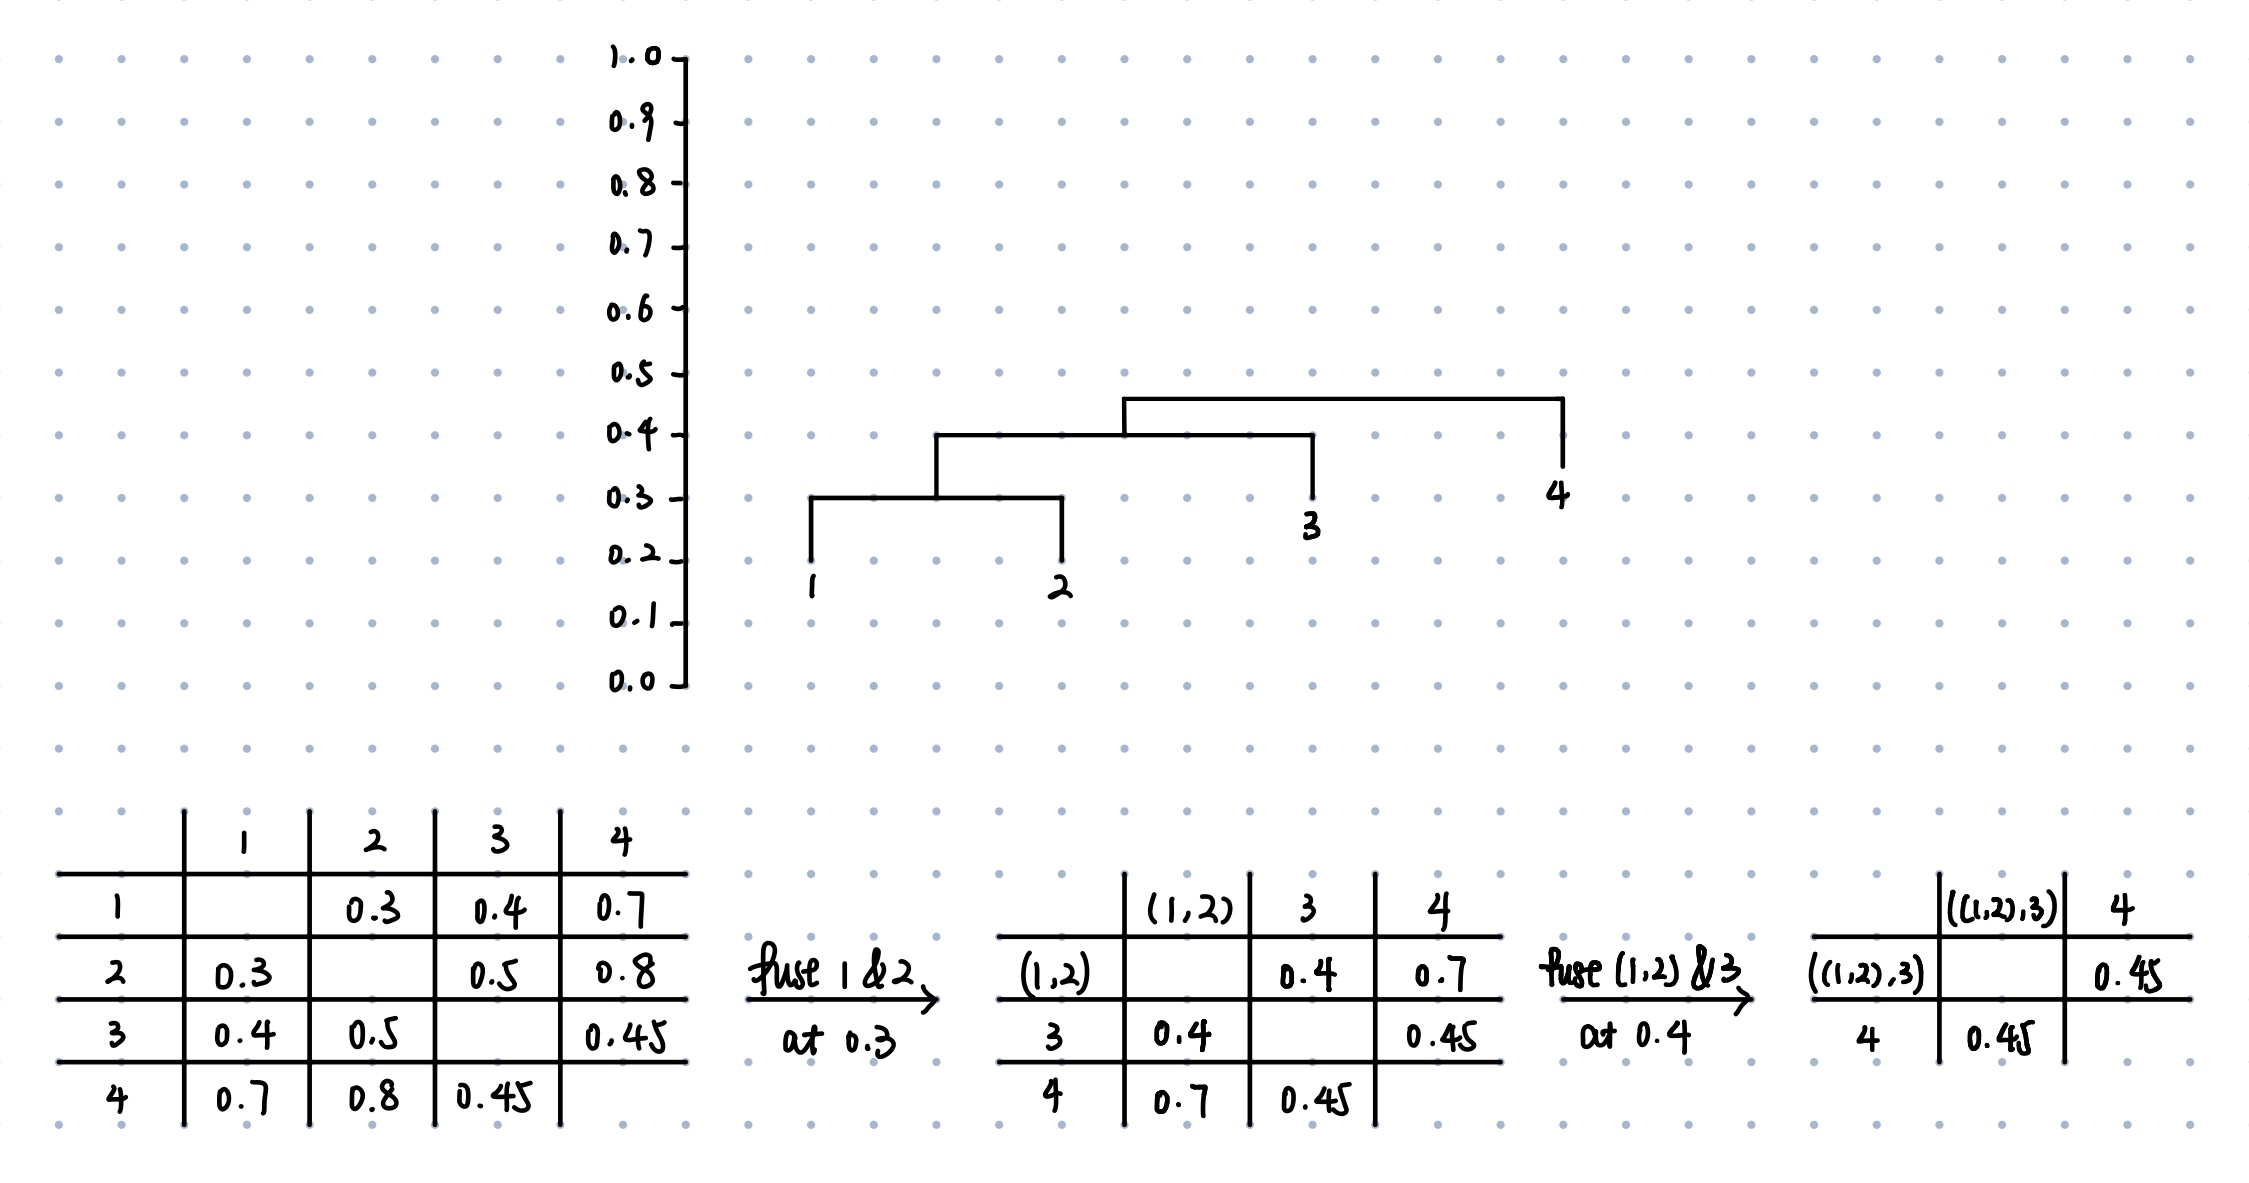

## 3. (c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

Observations 1 & 2 are in the first cluster, and Observations 3 & 4 are in the other cluster.

## 3. (d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

Observations 1, 2 & 3 are in the first cluster, and Observation 4 is in the other cluster.

## 3. (e) Draw a dendrogram that is equivalent to the dendrogram in (a)
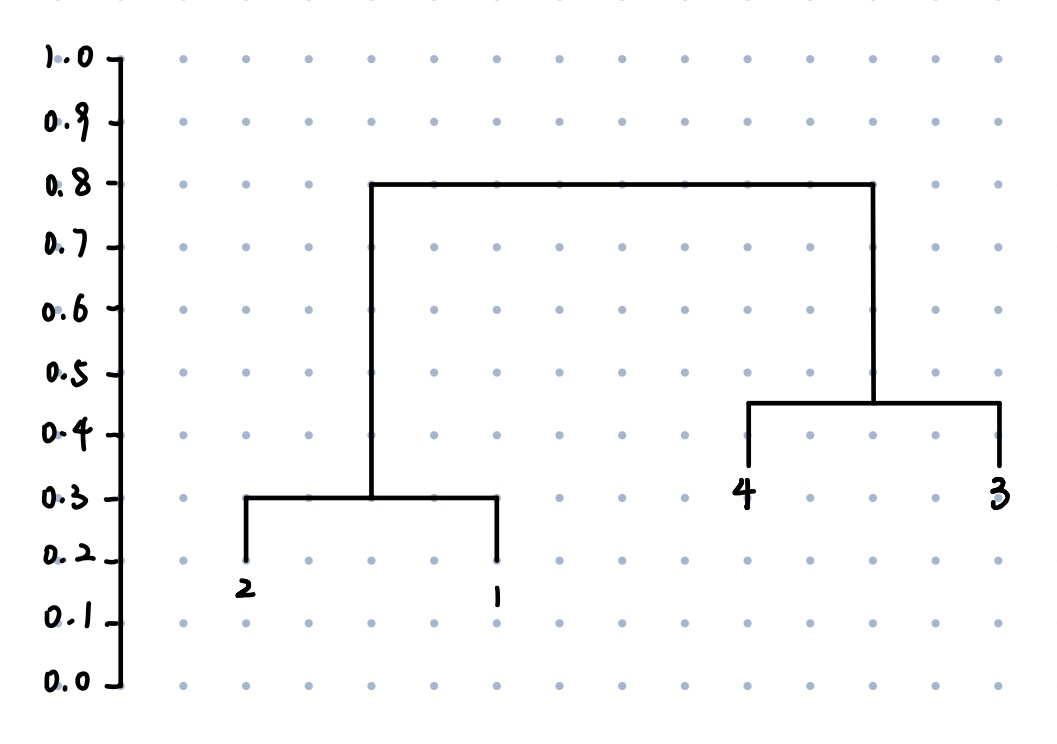